In [135]:
import os
import sys

sys.path.append(os.path.join('..'))
from models import *
import activation_functions
from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


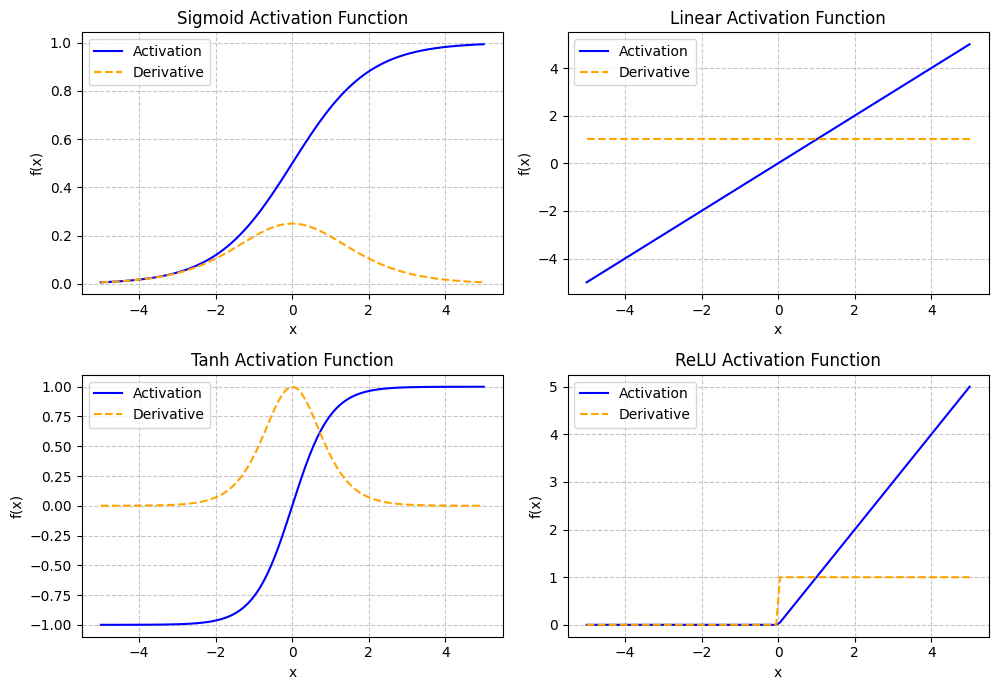

In [136]:
plt.figure(figsize=(10, 7))
plt.subplot(2, 2, 1)
activation_functions.test(Sigmoid(), final=False)
plt.subplot(2, 2, 2)
activation_functions.test(Linear(), final=False)
plt.subplot(2, 2, 3)
activation_functions.test(Tanh(), final=False)
plt.subplot(2, 2, 4)
activation_functions.test(ReLU(), final=False)
plt.tight_layout()

In [137]:
neuron_count = 80
neurons_in = 1
neurons_out = 1
architectures = [
    MLPArchitecture(neurons_in, [neuron_count], neurons_out),
    MLPArchitecture(neurons_in, [int(neuron_count/2), int(neuron_count/2)], neurons_out),
    MLPArchitecture(neurons_in, [int(neuron_count/4), int(neuron_count/2), int(neuron_count/4)], neurons_out),
]

for architecture in architectures:
    print(architecture)

Architecture:
1 -> [80] -> 1
Architecture:
1 -> [40, 40] -> 1
Architecture:
1 -> [20, 40, 20] -> 1


In [138]:
activation_functions = [
    Sigmoid(),
    Linear(),
    Tanh(),
    ReLU(),
]

# Testing for 80 neurons distributed across 1 - 3 layers
### 3 architectures:
 - `1 -> [80] -> 1`
 - `1 -> [40, 40] -> 1`
 - `1 -> [20, 40, 20] -> 1`
### 4 activation functions:
- `Sigmoid`
- `Linear`
- `Tanh`
- `ReLU`

### For multimodal-large dataset

In [189]:
models = []
for architecture in architectures:
    for activation_function in activation_functions:
        model = MLP(
            architecture=architecture,
            dataset_name='multimodal-large',
            data_dir='../data',
            activation_func=activation_function,
            initializer=XavierUniformInitializer(),
            name=architecture.__str__().split("\n")[1] + ' - ' + activation_function.__str__(),
        )
        models.append(model)

training_length = 500
def train_model(model):
    model.train(
        epochs=training_length,
        learning_rate=0.1,
        batch=True,
        batch_size=64,
        optimizer="rmsprop",
        rms_beta=0.9,
        save_till_best=True,
    )
    model.train(
        epochs=training_length,
        learning_rate=0.05,
        batch=True,
        batch_size=100,
        optimizer="rmsprop",
        rms_beta=0.9,
        save_till_best=True,
    )
    model.train(
        epochs=training_length,
        learning_rate=0.01,
        batch=True,
        batch_size=100,
        optimizer="rmsprop",
        rms_beta=0.99,
        save_till_best=True,
    )
    model.train(
        epochs=training_length,
        learning_rate=0.001,
        batch=True,
        batch_size=24,
        optimizer="rmsprop",
        rms_beta=0.99,
        save_till_best=True,
    )

### Training models with 1-layer architectures

--------------------------------------------------
Architecture: Architecture:
1 -> [80] -> 1, Activation function: Sigmoid
--------------------------------------------------


Training from age 0: (best_loss_test: 395.75, loss_test: 545.81): 100%|██████████| 500/500 [00:17<00:00, 28.71it/s] 


--------------------
Reverting to best model at age 488
Loss on train set: 353.04	Loss on test set: 395.75
--------------------
Model training finished at age 488 with loss 395.75 on test set


Training from age 488: (best_loss_test: 393.92, loss_test: 450.28): 100%|██████████| 500/500 [00:15<00:00, 32.95it/s]


--------------------
Reverting to best model at age 690
Loss on train set: 352.57	Loss on test set: 393.92
--------------------
Model training finished at age 690 with loss 393.92 on test set


Training from age 690: (best_loss_test: 389.87, loss_test: 395.31): 100%|██████████| 500/500 [00:15<00:00, 33.05it/s]


--------------------
Reverting to best model at age 1152
Loss on train set: 349.36	Loss on test set: 389.87
--------------------
Model training finished at age 1152 with loss 389.87 on test set


Training from age 1152: (best_loss_test: 389.64, loss_test: 390.37): 100%|██████████| 500/500 [00:24<00:00, 20.77it/s]


--------------------
Reverting to best model at age 1588
Loss on train set: 348.98	Loss on test set: 389.64
--------------------
Model training finished at age 1588 with loss 389.64 on test set


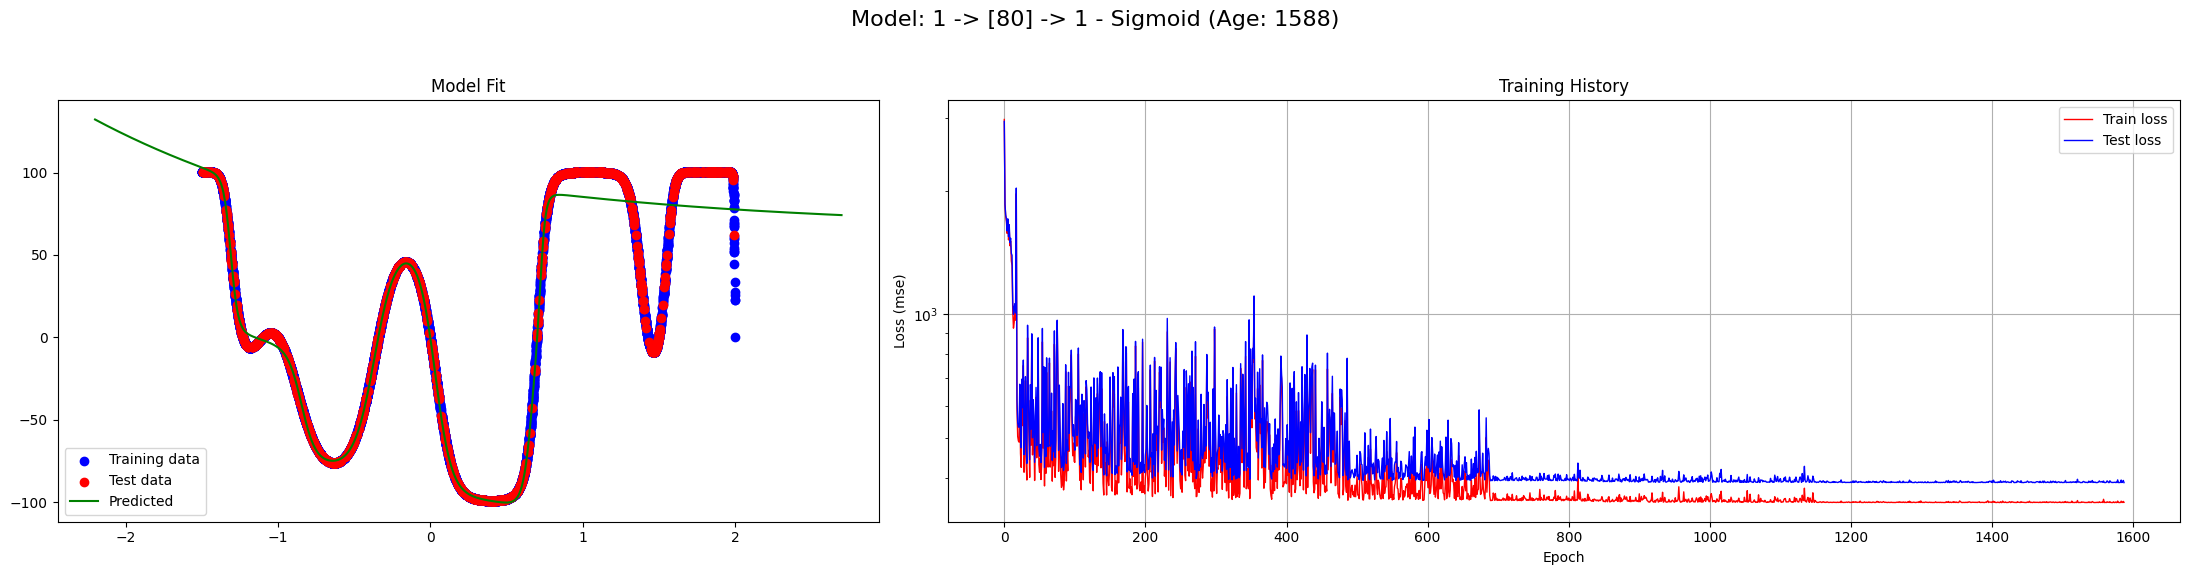

--------------------------------------------------
Architecture: Architecture:
1 -> [80] -> 1, Activation function: Linear
--------------------------------------------------


Training from age 0: (best_loss_test: 4434.02, loss_test: 5159.51): 100%|██████████| 500/500 [00:07<00:00, 64.82it/s]  


--------------------
Reverting to best model at age 266
Loss on train set: 4399.04	Loss on test set: 4434.02
--------------------
Model training finished at age 266 with loss 4434.02 on test set


Training from age 266: (best_loss_test: 4433.85, loss_test: 4462.88): 100%|██████████| 500/500 [00:06<00:00, 79.20it/s] 


--------------------
Reverting to best model at age 578
Loss on train set: 4398.58	Loss on test set: 4433.85
--------------------
Model training finished at age 578 with loss 4433.85 on test set


Training from age 578: (best_loss_test: 4433.58, loss_test: 4436.8): 100%|██████████| 500/500 [00:06<00:00, 79.27it/s] 


--------------------
Reverting to best model at age 850
Loss on train set: 4398.38	Loss on test set: 4433.58
--------------------
Model training finished at age 850 with loss 4433.58 on test set


Training from age 850: (best_loss_test: 4433.57, loss_test: 4434.66): 100%|██████████| 500/500 [00:14<00:00, 34.24it/s]


--------------------
Reverting to best model at age 1096
Loss on train set: 4398.38	Loss on test set: 4433.57
--------------------
Model training finished at age 1096 with loss 4433.57 on test set


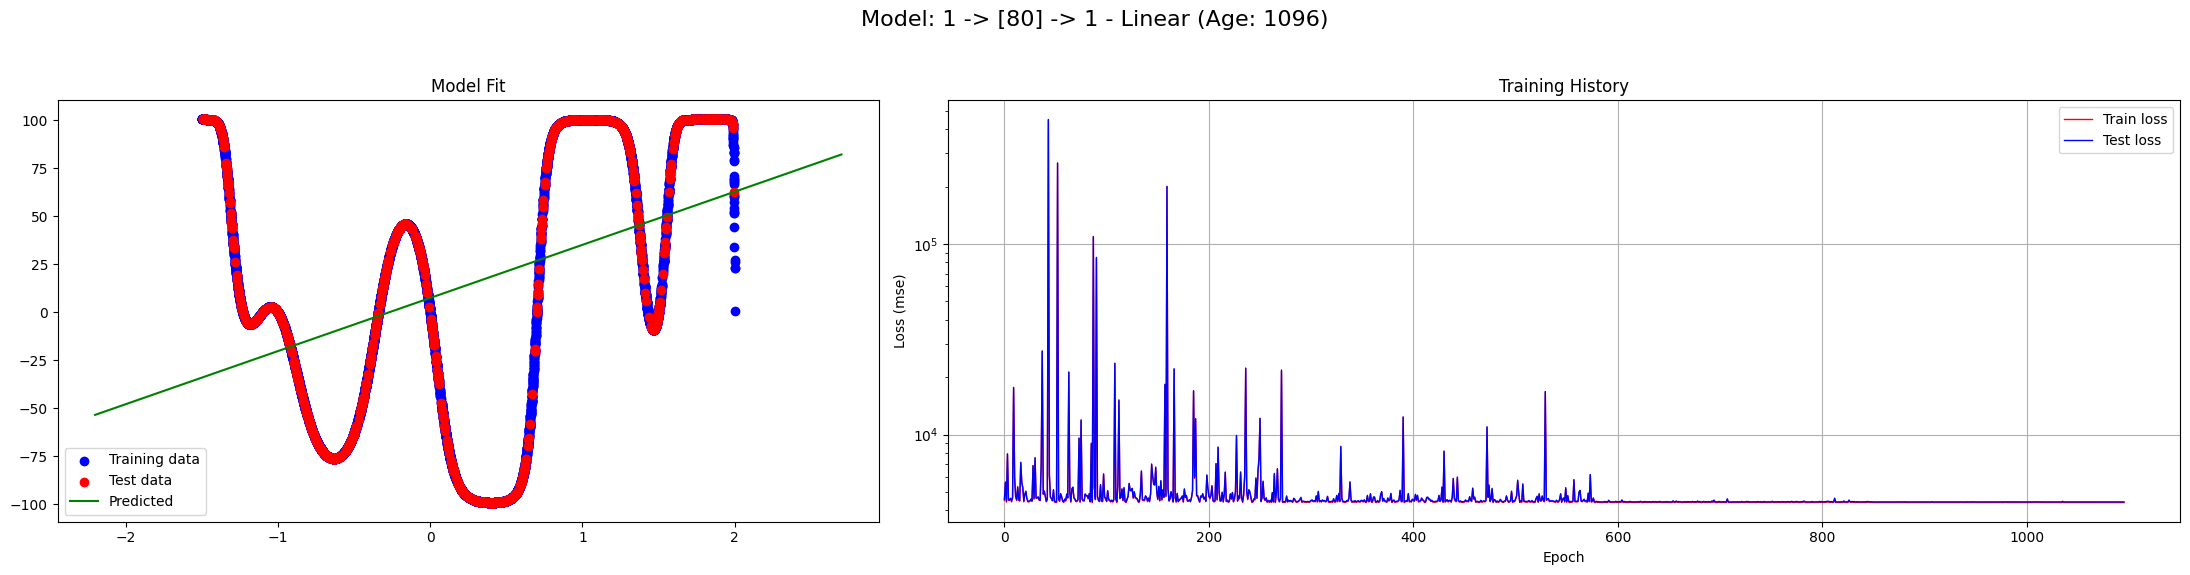

--------------------------------------------------
Architecture: Architecture:
1 -> [80] -> 1, Activation function: Tanh
--------------------------------------------------


Training from age 0: (best_loss_test: 482.98, loss_test: 1944.12): 100%|██████████| 500/500 [00:13<00:00, 37.30it/s]  


--------------------
Reverting to best model at age 59
Loss on train set: 445.44	Loss on test set: 482.98
--------------------
Model training finished at age 59 with loss 482.98 on test set


Training from age 59: (best_loss_test: 395.69, loss_test: 412.33): 100%|██████████| 500/500 [00:11<00:00, 42.25it/s] 


--------------------
Reverting to best model at age 420
Loss on train set: 354.37	Loss on test set: 395.69
--------------------
Model training finished at age 420 with loss 395.69 on test set


Training from age 420: (best_loss_test: 13.74, loss_test: 20.75): 100%|██████████| 500/500 [00:11<00:00, 42.30it/s]  


--------------------
Reverting to best model at age 905
Loss on train set: 16.16	Loss on test set: 13.74
--------------------
Model training finished at age 905 with loss 13.74 on test set


Training from age 905: (best_loss_test: 6.5, loss_test: 6.5) : 100%|██████████| 500/500 [00:20<00:00, 24.71it/s]   


--------------------
Reverting to best model at age 1404
Loss on train set: 10.33	Loss on test set: 6.5
--------------------
Model training finished at age 1404 with loss 6.5 on test set


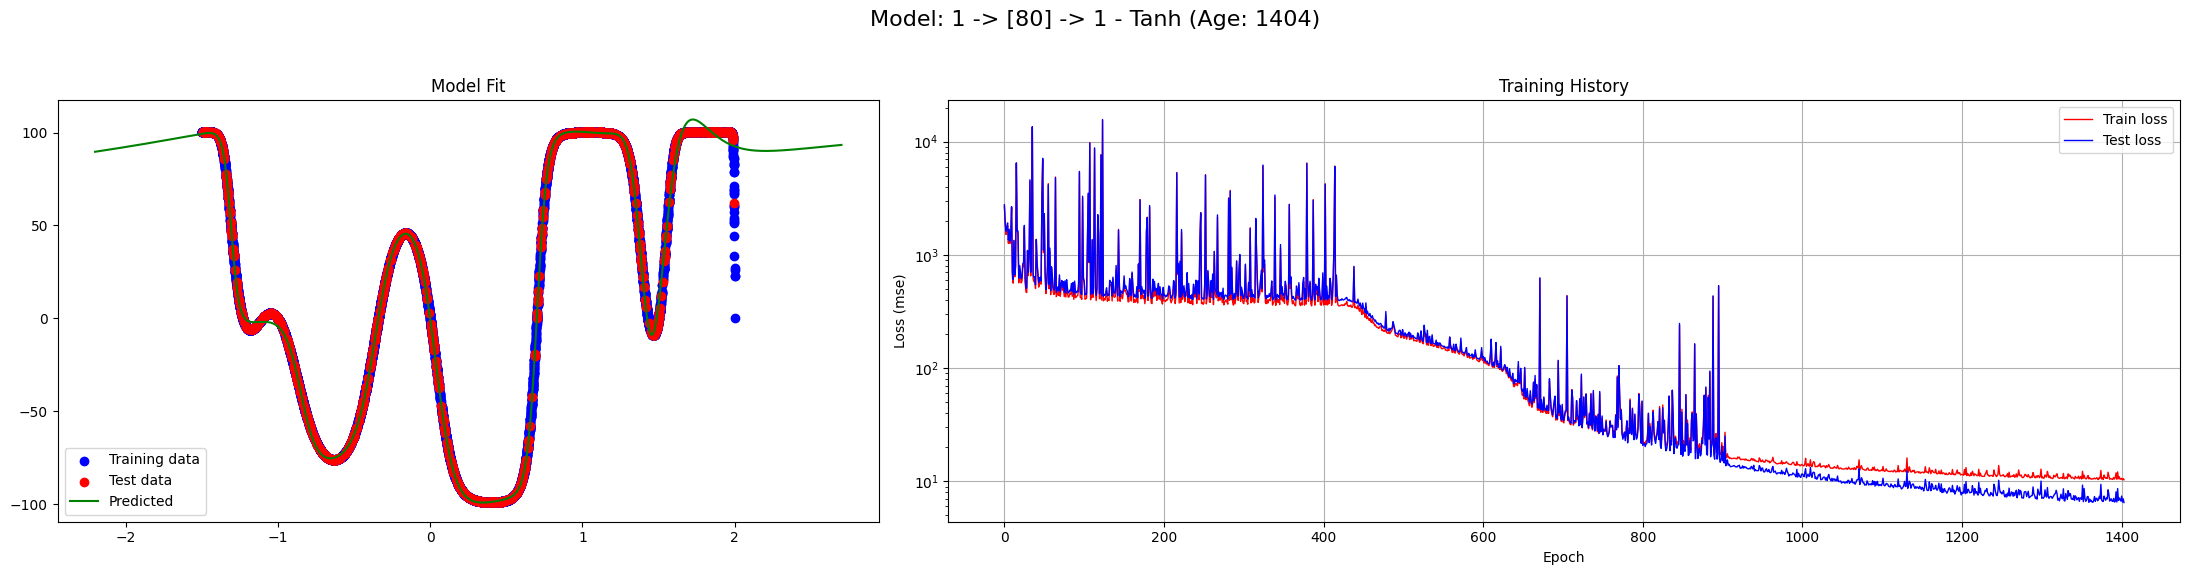

--------------------------------------------------
Architecture: Architecture:
1 -> [80] -> 1, Activation function: ReLU
--------------------------------------------------


Training from age 0: (best_loss_test: 1717.91, loss_test: 3548.02): 100%|██████████| 500/500 [00:09<00:00, 53.85it/s]


--------------------
Reverting to best model at age 450
Loss on train set: 1720.79	Loss on test set: 1717.91
--------------------
Model training finished at age 450 with loss 1717.91 on test set


Training from age 450: (best_loss_test: 1571.06, loss_test: 1578.74): 100%|██████████| 500/500 [00:07<00:00, 64.83it/s]


--------------------
Reverting to best model at age 861
Loss on train set: 1565.71	Loss on test set: 1571.06
--------------------
Model training finished at age 861 with loss 1571.06 on test set


Training from age 861: (best_loss_test: 1513.49, loss_test: 1571.25): 100%|██████████| 500/500 [00:07<00:00, 64.94it/s]


--------------------
Reverting to best model at age 1335
Loss on train set: 1504.97	Loss on test set: 1513.49
--------------------
Model training finished at age 1335 with loss 1513.49 on test set


Training from age 1335: (best_loss_test: 1512.01, loss_test: 1512.23): 100%|██████████| 500/500 [00:17<00:00, 29.07it/s]


--------------------
Reverting to best model at age 1813
Loss on train set: 1502.68	Loss on test set: 1512.01
--------------------
Model training finished at age 1813 with loss 1512.01 on test set


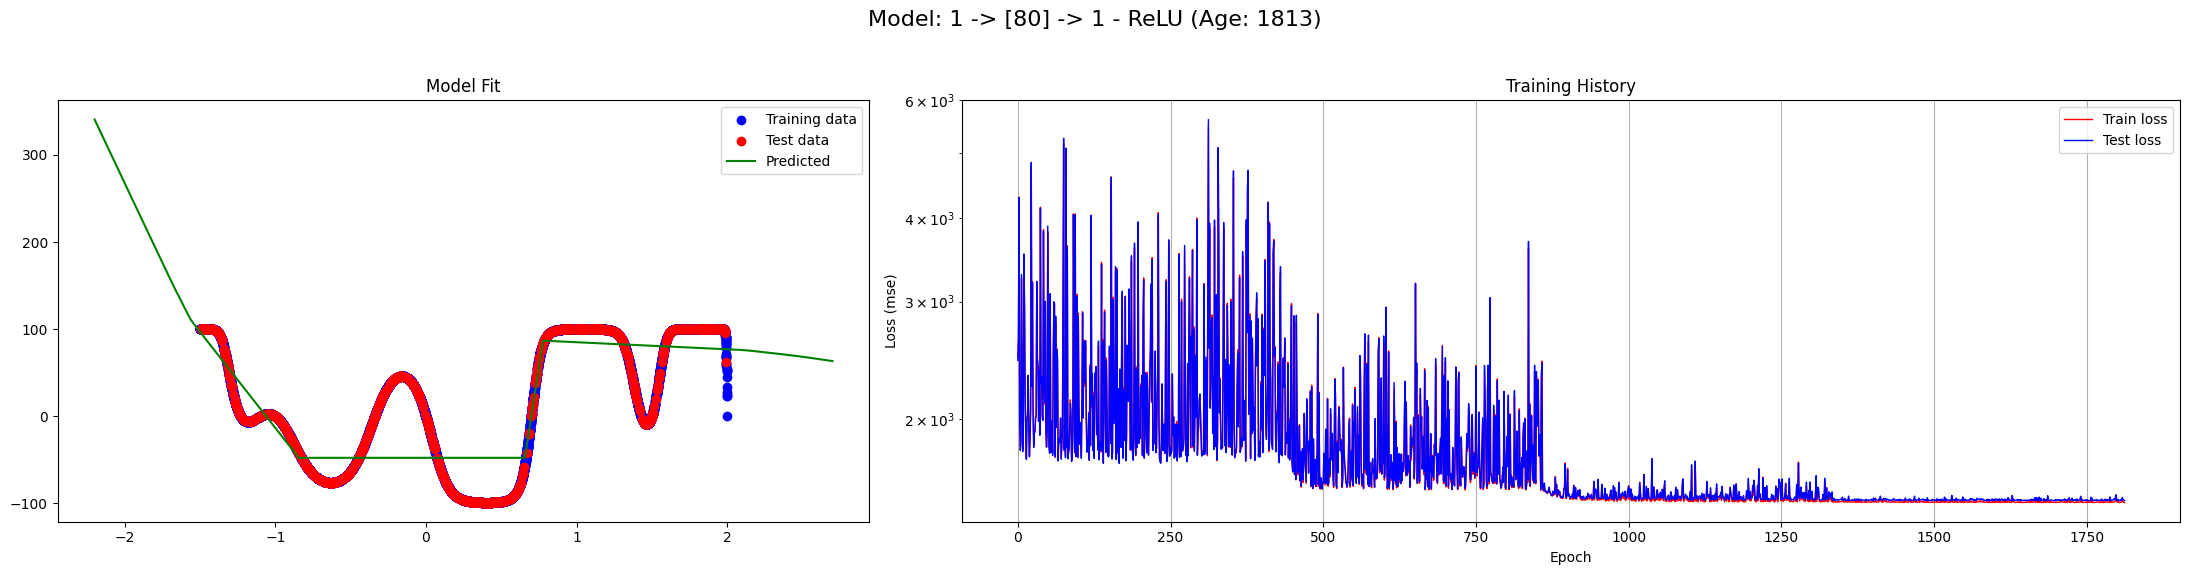

In [190]:
architecture_idx = 0
current_architecture = architectures[architecture_idx]
first_model_idx = 4*architecture_idx
for idx, model in enumerate(models[first_model_idx:first_model_idx + 4]):
    models[idx+first_model_idx] = MLP(
        architecture=current_architecture,
        dataset_name='multimodal-large',
        data_dir='../data',
        activation_func=model.activation_func,
        initializer=XavierUniformInitializer(),
        name=model.name,
    )
    model = models[idx+first_model_idx]
    print('-' * 50)
    print(f'Architecture: {model.architecture}, Activation function: {model.activation_func}')
    print('-' * 50)
    train_model(model)
    model.plot_fit_and_history()

### Training models with 2-layer architectures

--------------------------------------------------
Architecture: Architecture:
1 -> [40, 40] -> 1, Activation function: Sigmoid
--------------------------------------------------


Training from age 0: (best_loss_test: 1112.43, loss_test: 1350.38): 100%|██████████| 500/500 [00:21<00:00, 22.90it/s]


--------------------
Reverting to best model at age 494
Loss on train set: 1008.65	Loss on test set: 1112.43
--------------------
Model training finished at age 494 with loss 1112.43 on test set


Training from age 494: (best_loss_test: 1108.22, loss_test: 1121.18): 100%|██████████| 500/500 [00:18<00:00, 26.39it/s]


--------------------
Reverting to best model at age 985
Loss on train set: 1000.47	Loss on test set: 1108.22
--------------------
Model training finished at age 985 with loss 1108.22 on test set


Training from age 985: (best_loss_test: 1107.42, loss_test: 1111.33): 100%|██████████| 500/500 [00:18<00:00, 26.44it/s]


--------------------
Reverting to best model at age 1479
Loss on train set: 998.48	Loss on test set: 1107.42
--------------------
Model training finished at age 1479 with loss 1107.42 on test set


Training from age 1479: (best_loss_test: 1107.34, loss_test: 1108.12): 100%|██████████| 500/500 [00:34<00:00, 14.40it/s]


--------------------
Reverting to best model at age 1921
Loss on train set: 998.26	Loss on test set: 1107.34
--------------------
Model training finished at age 1921 with loss 1107.34 on test set


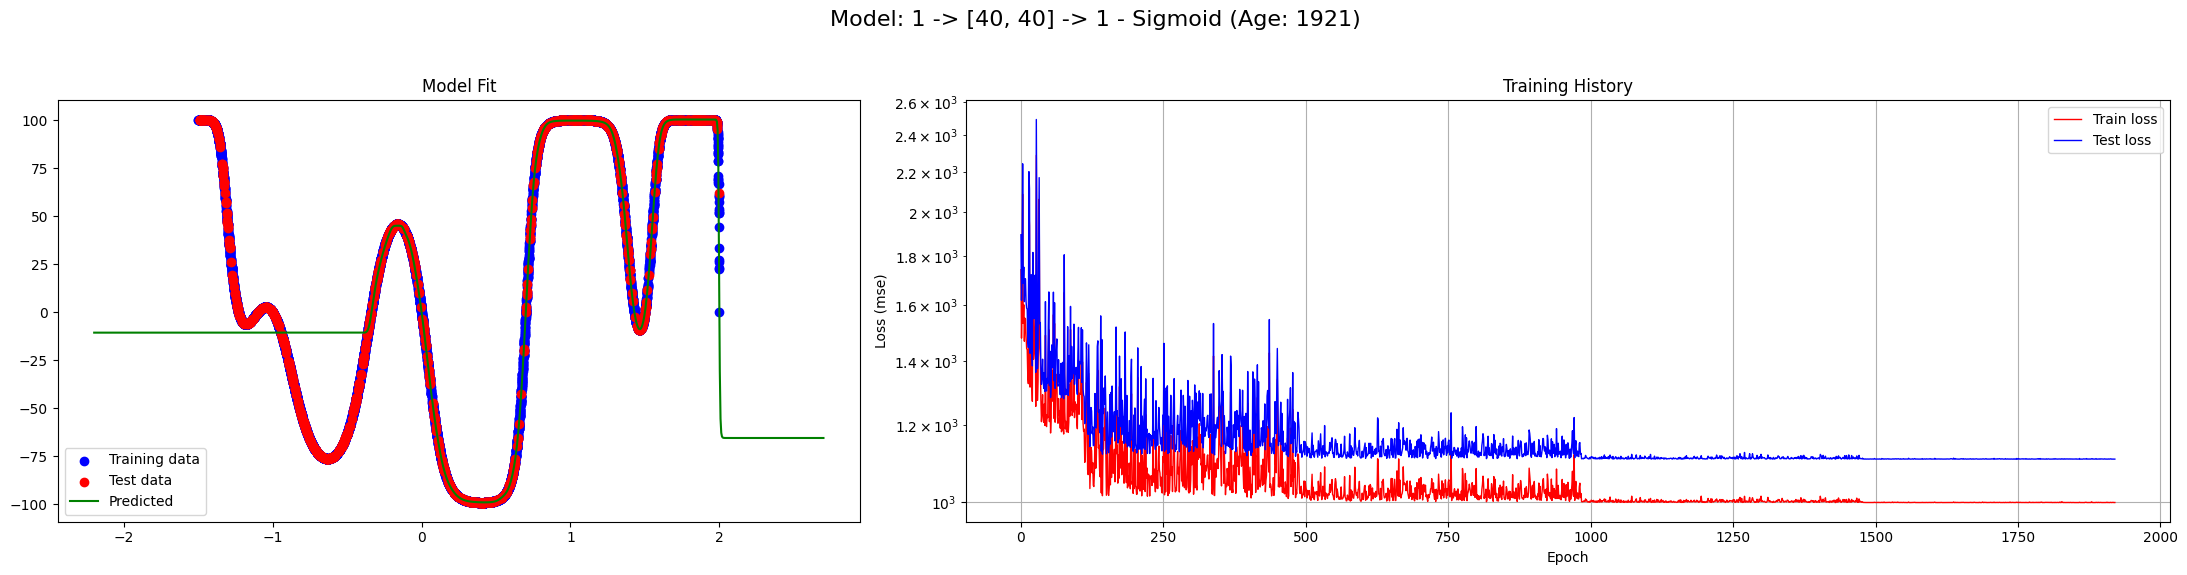

--------------------------------------------------
Architecture: Architecture:
1 -> [40, 40] -> 1, Activation function: Linear
--------------------------------------------------


Training from age 0: (best_loss_test: 4437.22, loss_test: 5511.87): 100%|██████████| 500/500 [00:12<00:00, 39.60it/s]   


--------------------
Reverting to best model at age 389
Loss on train set: 4403.11	Loss on test set: 4437.22
--------------------
Model training finished at age 389 with loss 4437.22 on test set


Training from age 389: (best_loss_test: 4435.1, loss_test: 6458.48): 100%|██████████| 500/500 [00:10<00:00, 48.92it/s]  


--------------------
Reverting to best model at age 616
Loss on train set: 4400.79	Loss on test set: 4435.1
--------------------
Model training finished at age 616 with loss 4435.1 on test set


Training from age 616: (best_loss_test: 4433.6, loss_test: 4440.99): 100%|██████████| 500/500 [00:10<00:00, 49.09it/s] 


--------------------
Reverting to best model at age 1032
Loss on train set: 4398.46	Loss on test set: 4433.6
--------------------
Model training finished at age 1032 with loss 4433.6 on test set


Training from age 1032: (best_loss_test: 4433.57, loss_test: 4434.96): 100%|██████████| 500/500 [00:23<00:00, 21.44it/s]


--------------------
Reverting to best model at age 1175
Loss on train set: 4398.38	Loss on test set: 4433.57
--------------------
Model training finished at age 1175 with loss 4433.57 on test set


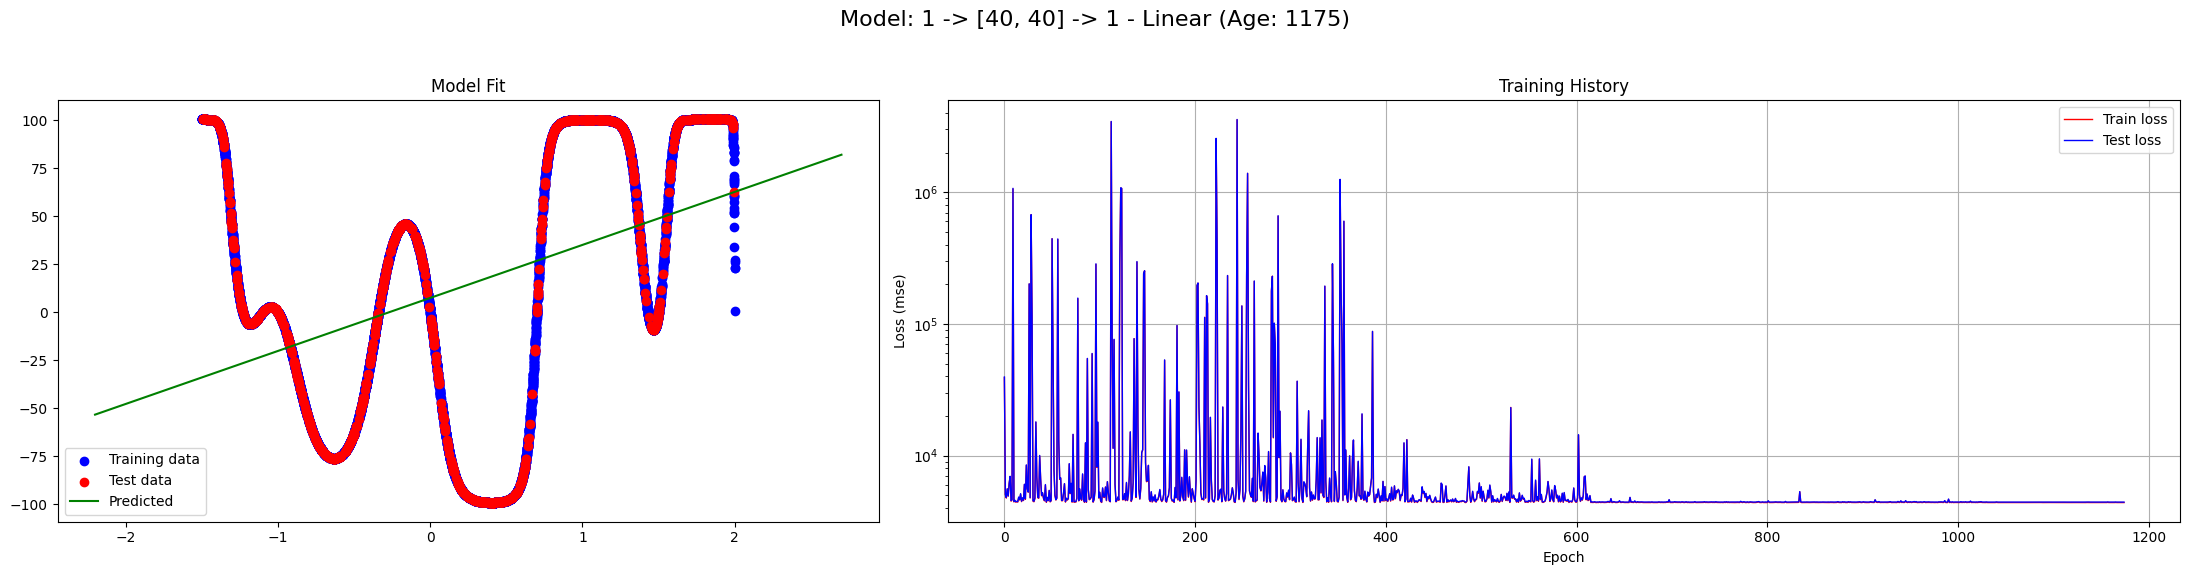

--------------------------------------------------
Architecture: Architecture:
1 -> [40, 40] -> 1, Activation function: Tanh
--------------------------------------------------


Training from age 0: (best_loss_test: 1928.36, loss_test: 10597.83): 100%|██████████| 500/500 [00:18<00:00, 27.30it/s]


--------------------
Reverting to best model at age 92
Loss on train set: 1805.75	Loss on test set: 1928.36
--------------------
Model training finished at age 92 with loss 1928.36 on test set


Training from age 92: (best_loss_test: 212.88, loss_test: 588.0): 100%|██████████| 500/500 [00:15<00:00, 32.14it/s]  


--------------------
Reverting to best model at age 424
Loss on train set: 242.03	Loss on test set: 212.88
--------------------
Model training finished at age 424 with loss 212.88 on test set


Training from age 424: (best_loss_test: 22.38, loss_test: 363.2): 100%|██████████| 500/500 [00:15<00:00, 32.32it/s] 


--------------------
Reverting to best model at age 864
Loss on train set: 27.54	Loss on test set: 22.38
--------------------
Model training finished at age 864 with loss 22.38 on test set


Training from age 864: (best_loss_test: 7.61, loss_test: 9.57): 100%|██████████| 500/500 [00:29<00:00, 17.19it/s]  


--------------------
Reverting to best model at age 1328
Loss on train set: 13.99	Loss on test set: 7.61
--------------------
Model training finished at age 1328 with loss 7.61 on test set


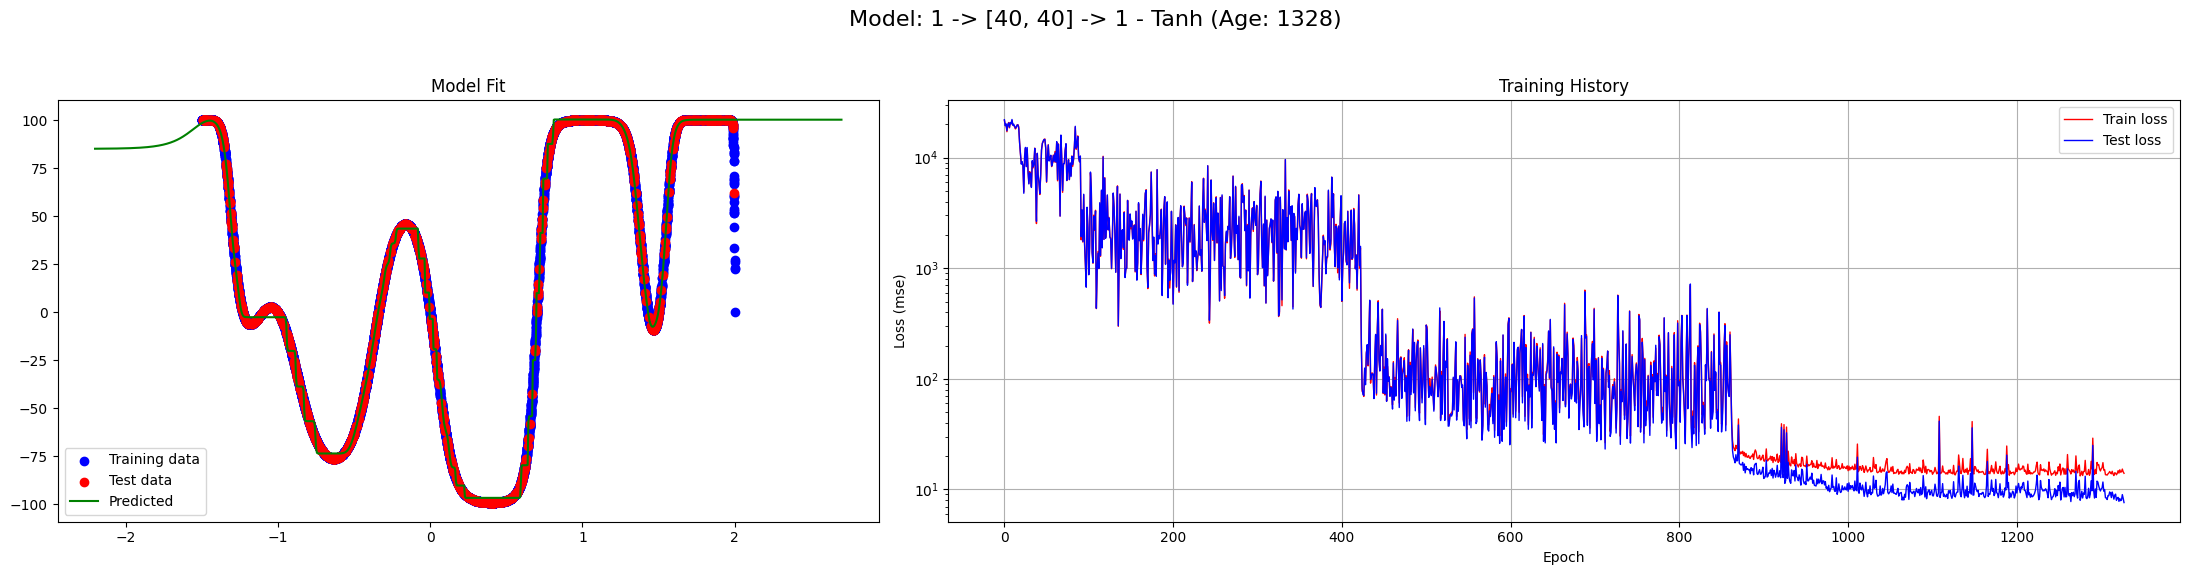

--------------------------------------------------
Architecture: Architecture:
1 -> [40, 40] -> 1, Activation function: ReLU
--------------------------------------------------


Training from age 0: (best_loss_test: 1378.8, loss_test: 2408.59): 100%|██████████| 500/500 [00:16<00:00, 30.12it/s] 


--------------------
Reverting to best model at age 446
Loss on train set: 1272.31	Loss on test set: 1378.8
--------------------
Model training finished at age 446 with loss 1378.8 on test set


Training from age 446: (best_loss_test: 1375.0, loss_test: 1442.09): 100%|██████████| 500/500 [00:13<00:00, 37.68it/s] 


--------------------
Reverting to best model at age 552
Loss on train set: 1268.92	Loss on test set: 1375.0
--------------------
Model training finished at age 552 with loss 1375.0 on test set


Training from age 552: (best_loss_test: 1370.69, loss_test: 1374.64): 100%|██████████| 500/500 [00:13<00:00, 37.76it/s]


--------------------
Reverting to best model at age 668
Loss on train set: 1264.0	Loss on test set: 1370.69
--------------------
Model training finished at age 668 with loss 1370.69 on test set


Training from age 668: (best_loss_test: 1370.45, loss_test: 1370.74): 100%|██████████| 500/500 [00:33<00:00, 14.88it/s]


--------------------
Reverting to best model at age 779
Loss on train set: 1263.05	Loss on test set: 1370.45
--------------------
Model training finished at age 779 with loss 1370.45 on test set


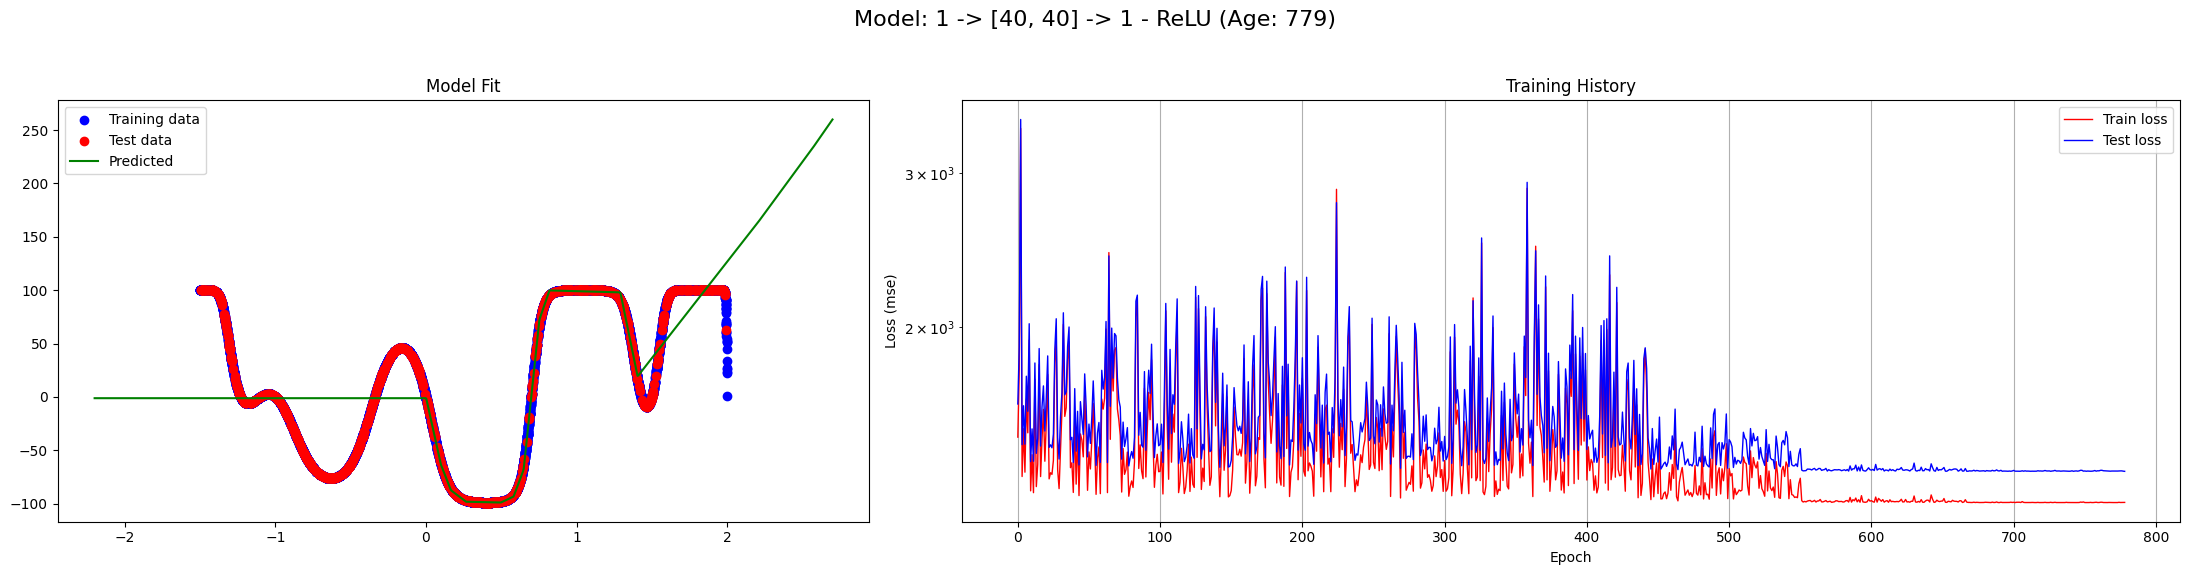

In [191]:
architecture_idx = 1
current_architecture = architectures[architecture_idx]
first_model_idx = 4*architecture_idx
for idx, model in enumerate(models[first_model_idx:first_model_idx + 4]):
    models[idx+first_model_idx] = MLP(
        architecture=current_architecture,
        dataset_name='multimodal-large',
        data_dir='../data',
        activation_func=model.activation_func,
        initializer=XavierUniformInitializer(),
        name=model.name,
    )
    model = models[idx+first_model_idx]
    print('-' * 50)
    print(f'Architecture: {model.architecture}, Activation function: {model.activation_func}')
    print('-' * 50)
    train_model(model)
    model.plot_fit_and_history()

### Training models with 3-layer architectures

--------------------------------------------------
Architecture: Architecture:
1 -> [20, 40, 20] -> 1, Activation function: Sigmoid
--------------------------------------------------


Training from age 0: (best_loss_test: 11.54, loss_test: 126.76): 100%|██████████| 500/500 [00:25<00:00, 19.96it/s]   


--------------------
Reverting to best model at age 265
Loss on train set: 15.48	Loss on test set: 11.54
--------------------
Model training finished at age 265 with loss 11.54 on test set


Training from age 265: (best_loss_test: 5.16, loss_test: 45.36): 100%|██████████| 500/500 [00:21<00:00, 23.53it/s] 


--------------------
Reverting to best model at age 538
Loss on train set: 9.96	Loss on test set: 5.16
--------------------
Model training finished at age 538 with loss 5.16 on test set


Training from age 538: (best_loss_test: 2.18, loss_test: 7.59): 100%|██████████| 500/500 [00:21<00:00, 23.50it/s] 


--------------------
Reverting to best model at age 987
Loss on train set: 7.35	Loss on test set: 2.18
--------------------
Model training finished at age 987 with loss 2.18 on test set


Training from age 987: (best_loss_test: 2.08, loss_test: 2.11): 100%|██████████| 500/500 [00:42<00:00, 11.89it/s]


--------------------
Reverting to best model at age 1433
Loss on train set: 7.27	Loss on test set: 2.08
--------------------
Model training finished at age 1433 with loss 2.08 on test set


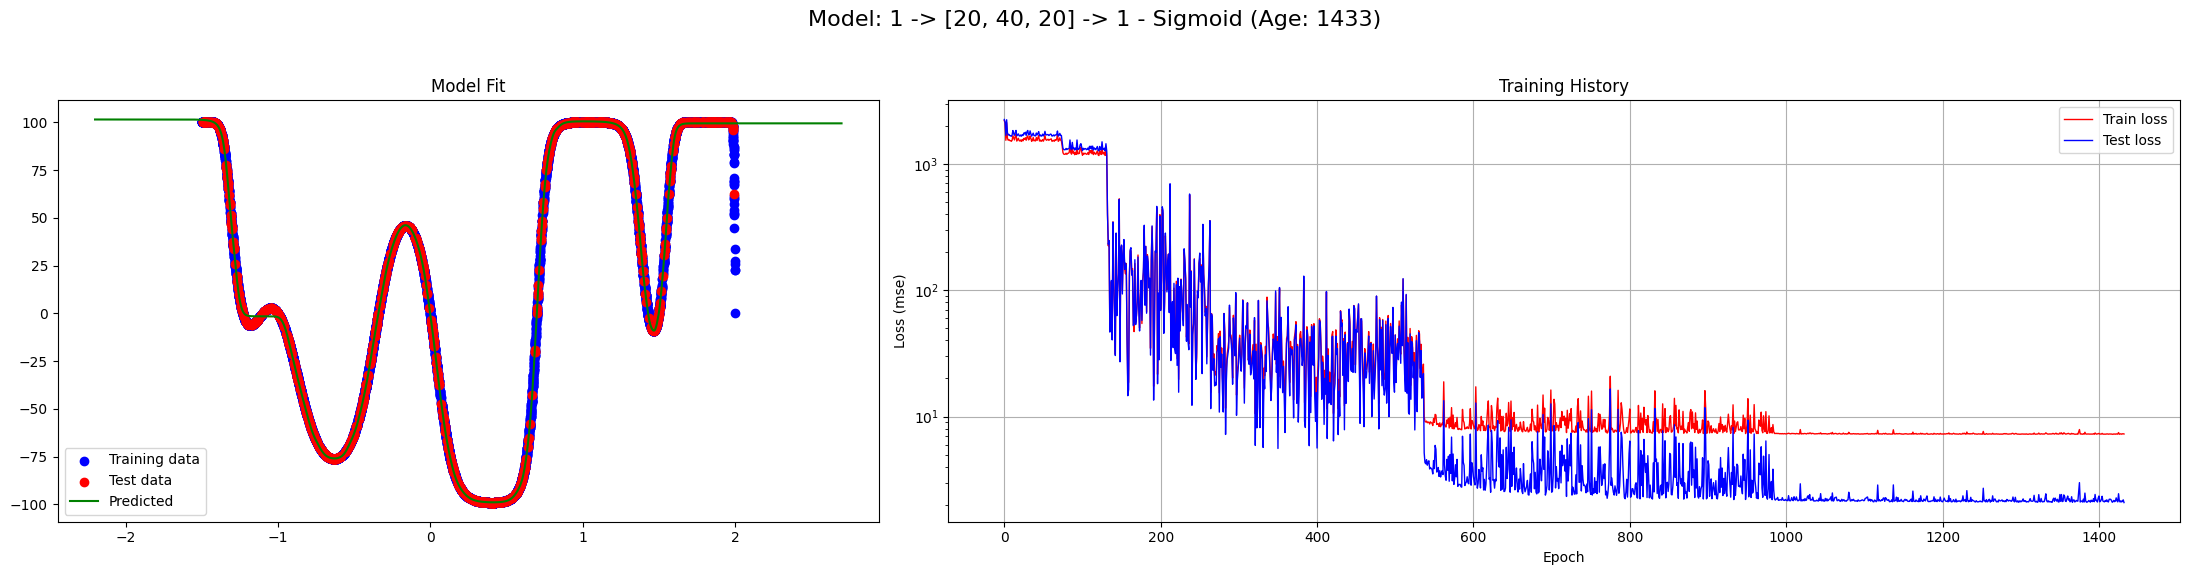

--------------------------------------------------
Architecture: Architecture:
1 -> [20, 40, 20] -> 1, Activation function: Linear
--------------------------------------------------


Training from age 0: (best_loss_test: 4441.82, loss_test: 5695.76): 100%|██████████| 500/500 [00:15<00:00, 33.17it/s]    


--------------------
Reverting to best model at age 37
Loss on train set: 4407.56	Loss on test set: 4441.82
--------------------
Model training finished at age 37 with loss 4441.82 on test set


Training from age 37: (best_loss_test: 4439.85, loss_test: 5411.83): 100%|██████████| 500/500 [00:11<00:00, 42.61it/s] 


--------------------
Reverting to best model at age 125
Loss on train set: 4404.98	Loss on test set: 4439.85
--------------------
Model training finished at age 125 with loss 4439.85 on test set


Training from age 125: (best_loss_test: 4433.58, loss_test: 4441.64): 100%|██████████| 500/500 [00:11<00:00, 42.57it/s]


--------------------
Reverting to best model at age 266
Loss on train set: 4398.3	Loss on test set: 4433.58
--------------------
Model training finished at age 266 with loss 4433.58 on test set


Training from age 266: (best_loss_test: 4433.58, loss_test: 4433.97): 100%|██████████| 500/500 [00:29<00:00, 17.19it/s]


--------------------
Reverting to best model at age 475
Loss on train set: 4398.37	Loss on test set: 4433.58
--------------------
Model training finished at age 475 with loss 4433.58 on test set


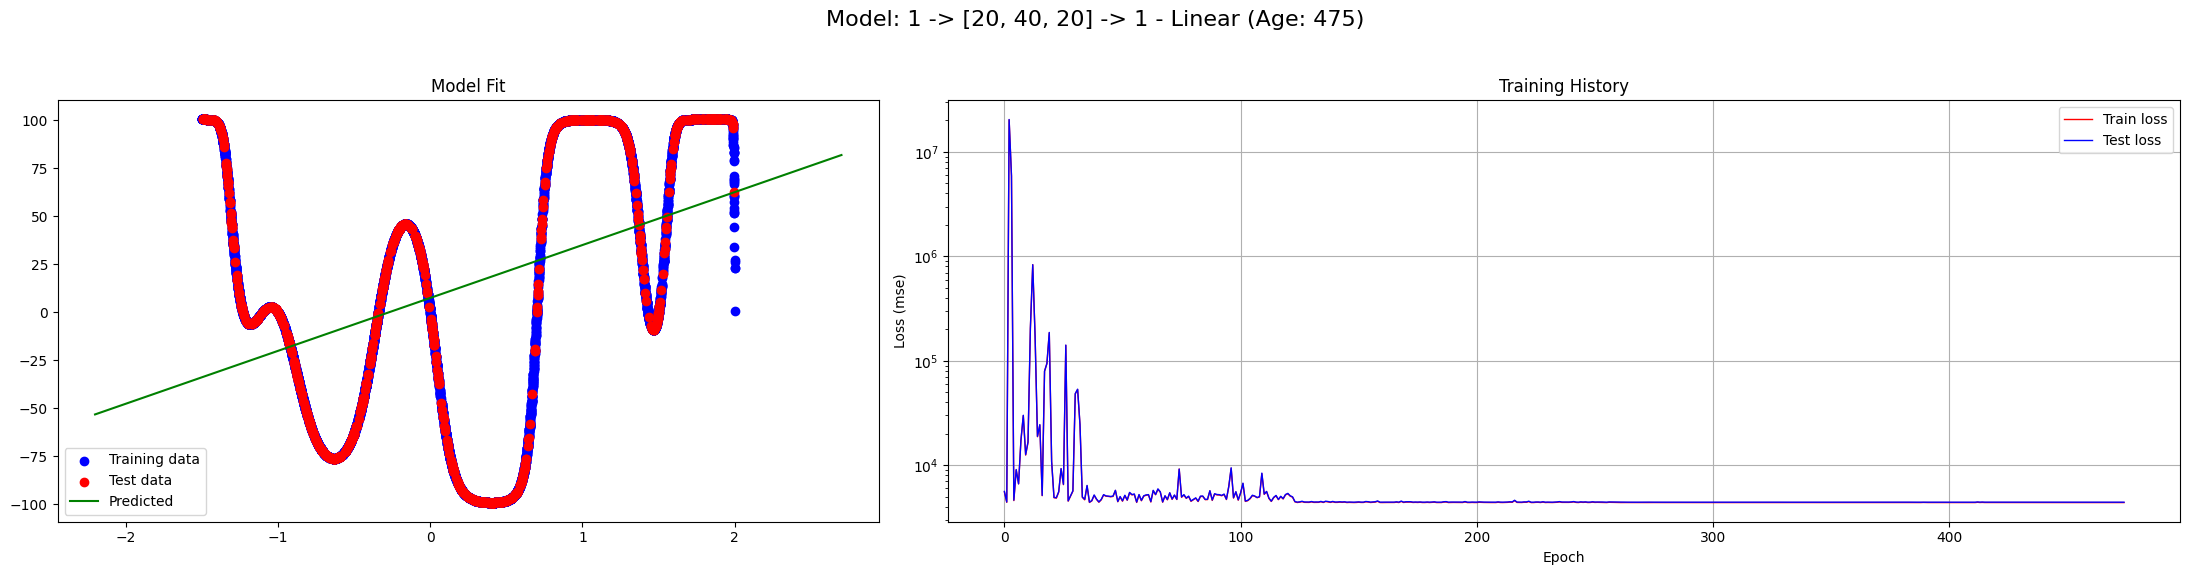

--------------------------------------------------
Architecture: Architecture:
1 -> [20, 40, 20] -> 1, Activation function: Tanh
--------------------------------------------------


Training from age 0: (best_loss_test: 1010.62, loss_test: 7481.25): 100%|██████████| 500/500 [00:22<00:00, 21.95it/s] 


--------------------
Reverting to best model at age 12
Loss on train set: 929.51	Loss on test set: 1010.62
--------------------
Model training finished at age 12 with loss 1010.62 on test set


Training from age 12: (best_loss_test: 504.74, loss_test: 1380.84): 100%|██████████| 500/500 [00:17<00:00, 28.08it/s]


--------------------
Reverting to best model at age 395
Loss on train set: 474.13	Loss on test set: 504.74
--------------------
Model training finished at age 395 with loss 504.74 on test set


Training from age 395: (best_loss_test: 339.89, loss_test: 346.97): 100%|██████████| 500/500 [00:18<00:00, 26.85it/s]


--------------------
Reverting to best model at age 831
Loss on train set: 305.38	Loss on test set: 339.89
--------------------
Model training finished at age 831 with loss 339.89 on test set


Training from age 831: (best_loss_test: 321.09, loss_test: 321.09): 100%|██████████| 500/500 [00:37<00:00, 13.49it/s]


--------------------
Reverting to best model at age 1330
Loss on train set: 290.68	Loss on test set: 321.09
--------------------
Model training finished at age 1330 with loss 321.09 on test set


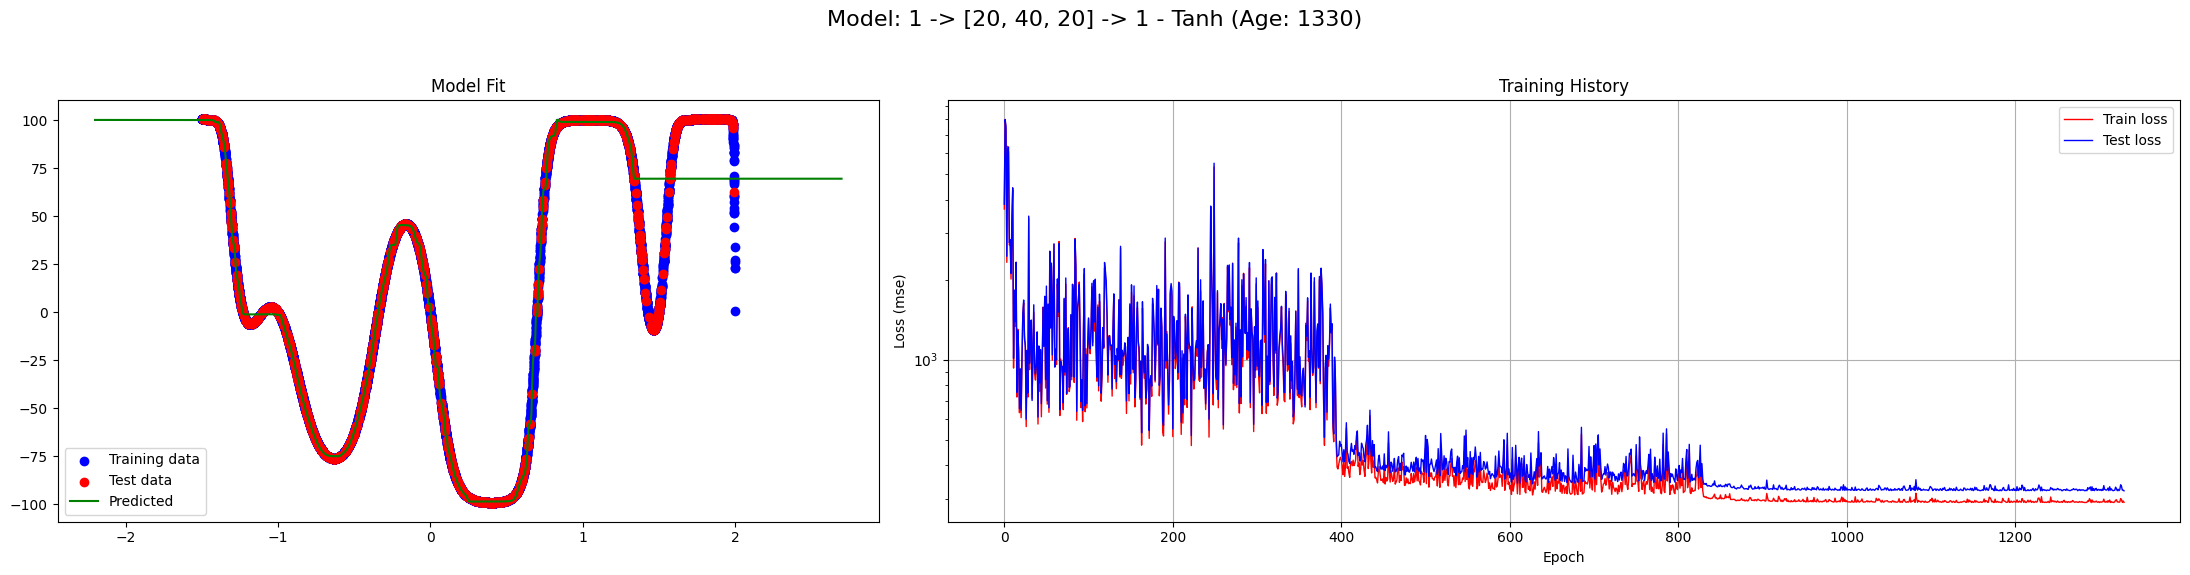

--------------------------------------------------
Architecture: Architecture:
1 -> [20, 40, 20] -> 1, Activation function: ReLU
--------------------------------------------------


Training from age 0: (best_loss_test: 5221.32, loss_test: 5225.43): 100%|██████████| 500/500 [00:19<00:00, 25.33it/s]


--------------------
Reverting to best model at age 330
Loss on train set: 5177.35	Loss on test set: 5221.32
--------------------
Model training finished at age 330 with loss 5221.32 on test set


Training from age 330: (best_loss_test: 5221.32, loss_test: 5221.94): 100%|██████████| 500/500 [00:15<00:00, 32.41it/s]


--------------------
Reverting to best model at age 330
Loss on train set: 5177.35	Loss on test set: 5221.32
--------------------
Model training finished at age 330 with loss 5221.32 on test set


Training from age 330: (best_loss_test: 5221.32, loss_test: 5222.61): 100%|██████████| 500/500 [00:15<00:00, 32.40it/s]


--------------------
Reverting to best model at age 330
Loss on train set: 5177.35	Loss on test set: 5221.32
--------------------
Model training finished at age 330 with loss 5221.32 on test set


Training from age 330: (best_loss_test: 5221.32, loss_test: 5221.32): 100%|██████████| 500/500 [00:39<00:00, 12.70it/s]


--------------------
Reverting to best model at age 505
Loss on train set: 5177.35	Loss on test set: 5221.32
--------------------
Model training finished at age 505 with loss 5221.32 on test set


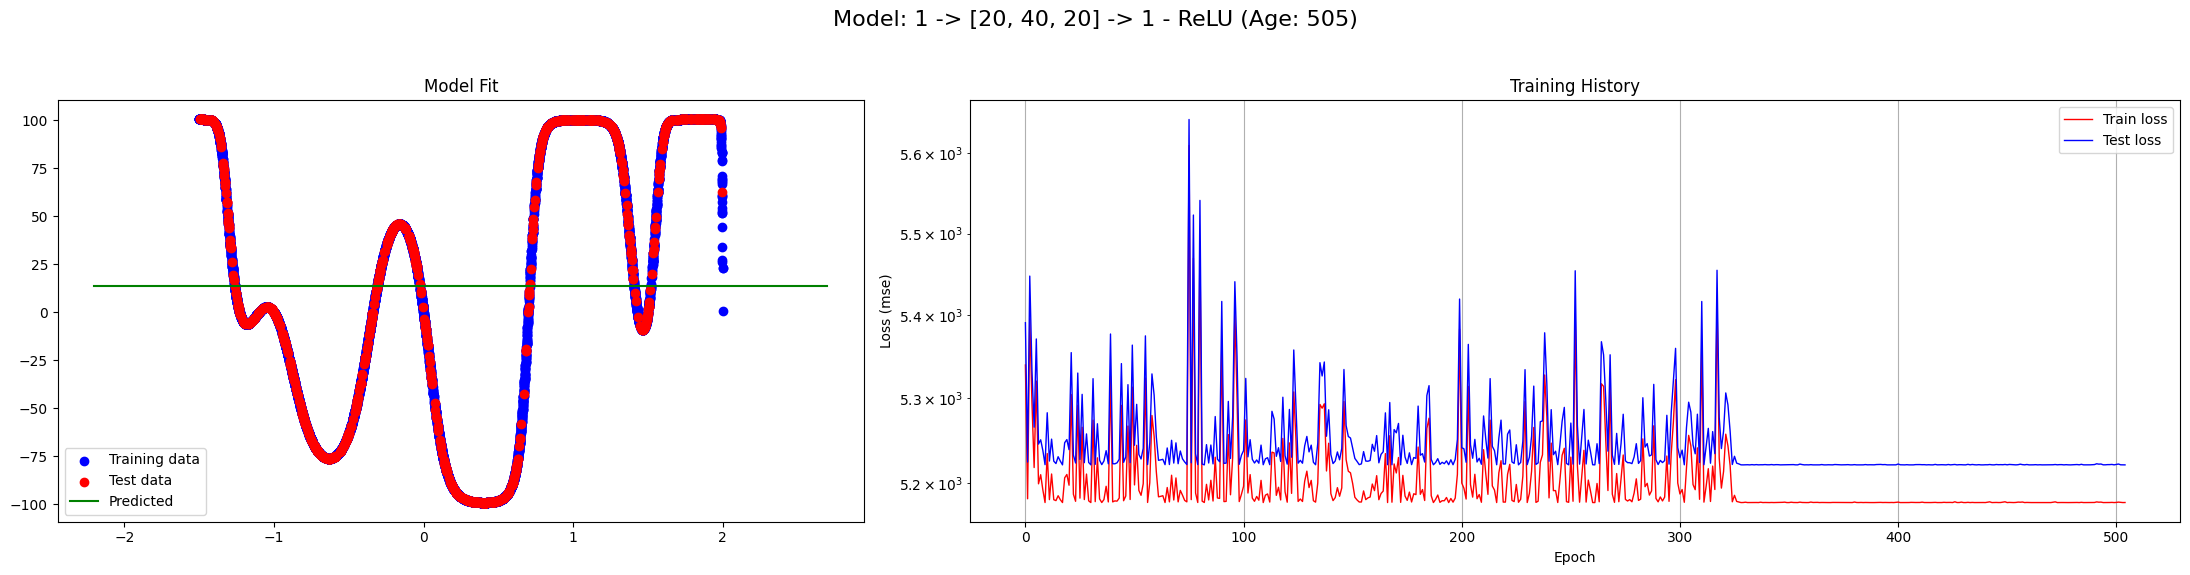

In [192]:
architecture_idx = 2
current_architecture = architectures[architecture_idx]
first_model_idx = 4*architecture_idx
for idx, model in enumerate(models[first_model_idx:first_model_idx + 4]):
    models[idx+first_model_idx] = MLP(
        architecture=current_architecture,
        dataset_name='multimodal-large',
        data_dir='../data',
        activation_func=model.activation_func,
        initializer=XavierUniformInitializer(),
        name=model.name,
    )
    model = models[idx+first_model_idx]
    print('-' * 50)
    print(f'Architecture: {model.architecture}, Activation function: {model.activation_func}')
    print('-' * 50)
    train_model(model)
    model.plot_fit_and_history()

In [200]:
def compare_models(models, smoothing=2):
    for model in models:
        start_age = 0
        end_age = model.age
        epochs = range(start_age, end_age, smoothing)
        if epochs[-1] != model.history.best_age-1:
            epochs = list(epochs) + [model.history.best_age-1]
        plt.plot(epochs, [model.history.loss_test[i] for i in epochs], label=model.name)
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Test Loss - mse')
    plt.yscale('log')
    plt.grid(True)

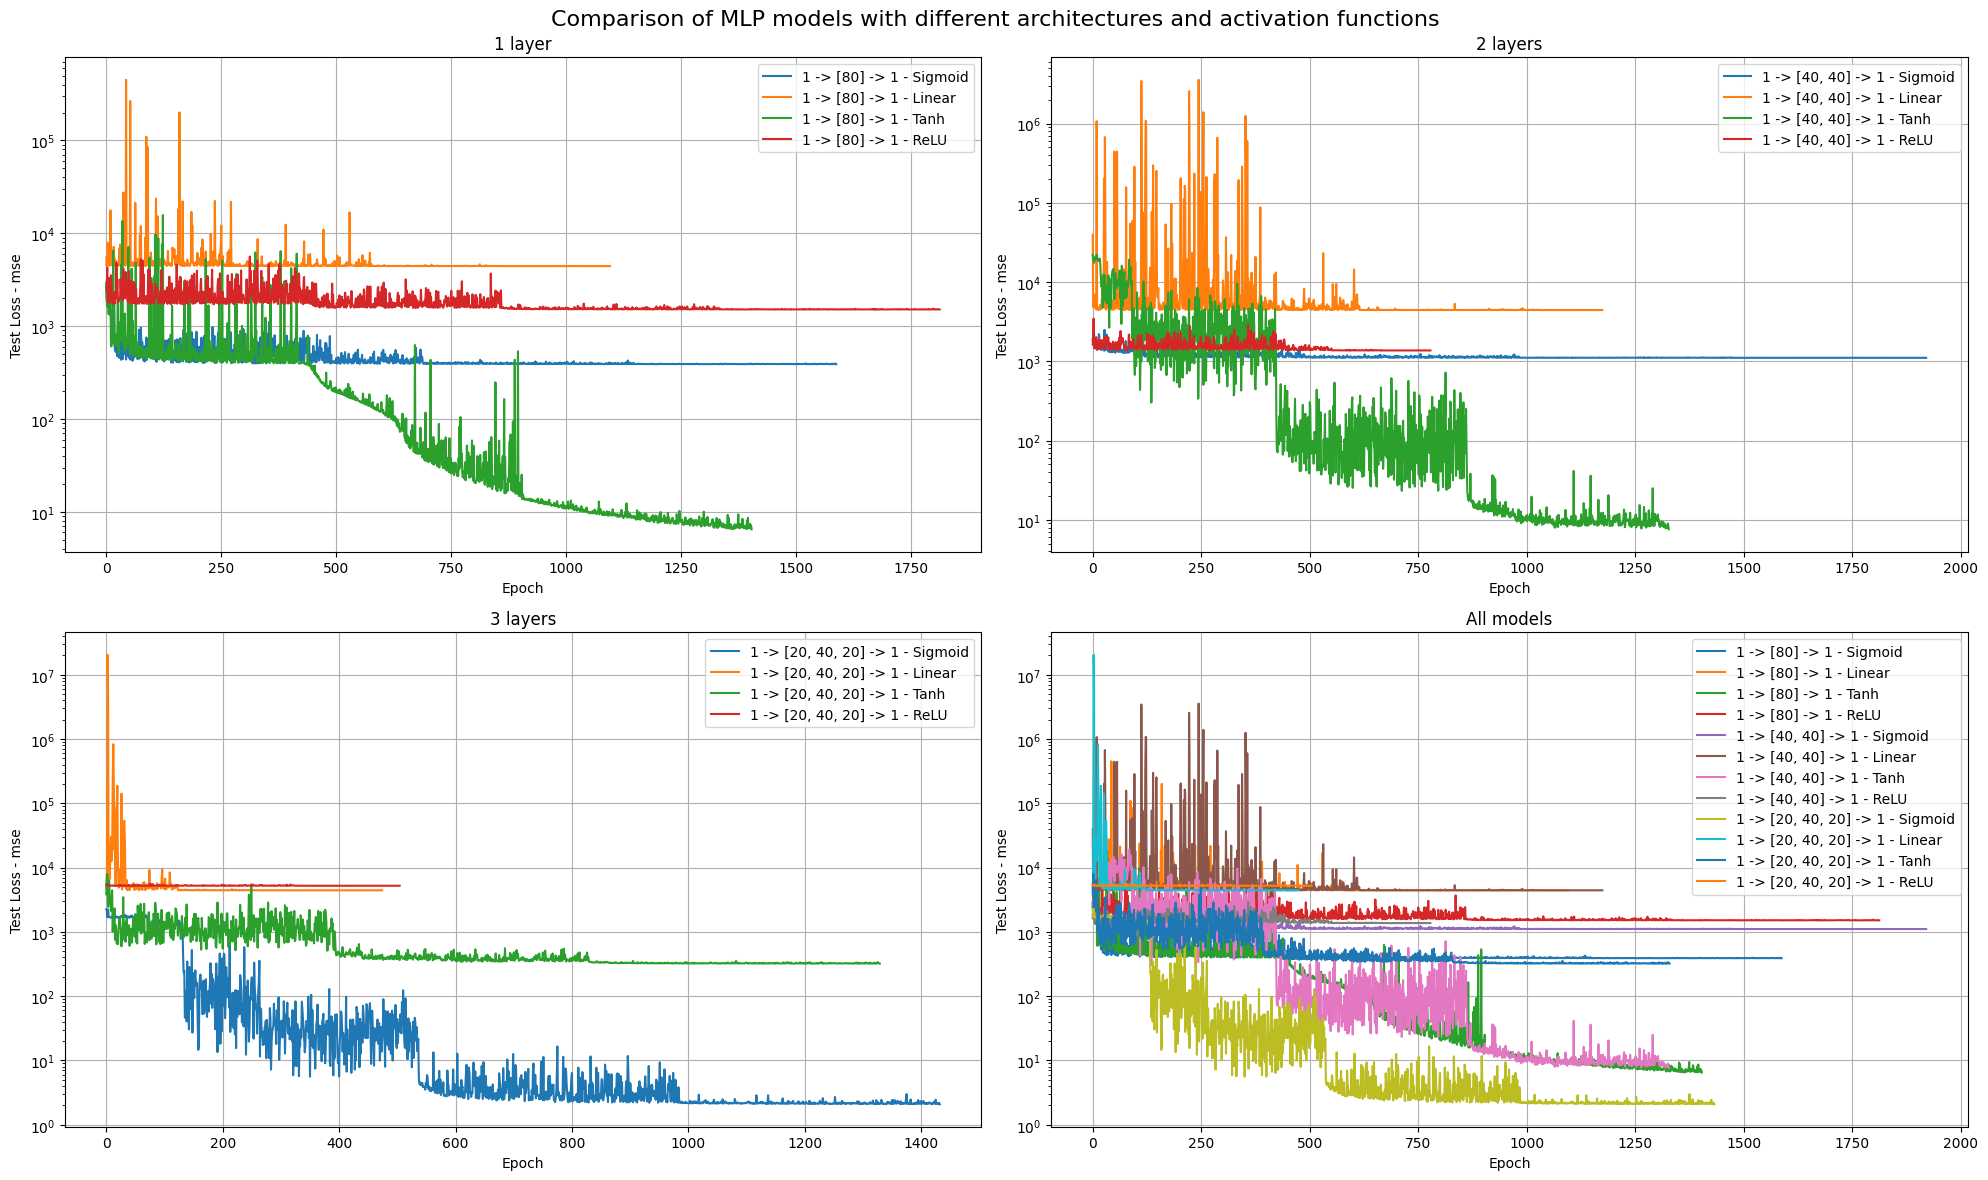

In [201]:
smoothing = 1
plt.figure(figsize=(20, 12))
plt.suptitle('Comparison of MLP models with different architectures and activation functions', fontsize=16)

plt.subplot(2, 2, 1)
plt.title('1 layer')
compare_models(models[0:4], smoothing=smoothing)

plt.subplot(2, 2, 2)
plt.title('2 layers')
compare_models(models[4:8], smoothing=smoothing)

plt.subplot(2, 2, 3)
plt.title('3 layers')
compare_models(models[8:12], smoothing=smoothing)

plt.subplot(2, 2, 4)
plt.title('All models')
compare_models(models, smoothing=smoothing)

plt.tight_layout()

## Wnioski:
 - Najlepsze wyniki osiągają modele z funkcją aktywacji tanh oraz sigmoid.
 - Funkcja aktywacji sigmoid najlepiej funkcjonuje przy bardziej złożonej architekturze
 - W przypadku funkcji tanh zwiększenie liczby warstw architektury wpłynęło negatywnie na osiągnięty wynik. Był on wyższy już w przypadku 1 lub 2 warstw

#### Można wyróżnić 3 konkurencyjne modele:
- `1 -> [80] -> 1  -  tanh` 
- `1 -> [40, 40] -> 1  -  tanh` 
- `1 -> [20, 40, 20] -> 1  -  sigmoid` 